# Tutorial 9a - Bulk elastic anisotropy

Although much of the SBS literature assumes that the elastic materials are isotropic, anisotropy of the elastic response can be an important effect. In general, anisotropy is often more significant in elastic physics than electromagnetic physics, because of the more involved tensor nature of the elastic theory. For instance, *cubic* materials such as silicon have an isotropic linear electromagnetic response but an anisotropic elastic linear response.

NumBAT supports arbitrary elastic nonlinearity in calculating elastic modes and the SBS gain of a waveguide. However, even the bulk elastic wave properties of anistropic materials is quite complex. This tutorial explores some of these effects. 

This exercise is most naturally performed interactively and so this example is written as a Jupyter notebook (see Tutorial 9 for an introduction to NumBAT in Jupyter).

## Theory

Bulk wave modes in linear elastic materials are found as eigen-solutions of the elastic wave equation for a uniform material.  
We start from the elastic wave equation at fixed frequency $\Omega$:
$$
\nabla \cdot \bar{T} + \Omega^2 \rho(x,y) \vec U = 0,
$$
where $\bar{T}$ is the stress tensor and $\vec U$ is the displacement field.
(In this notebook, we use overlined quantities to denote a general tensor, and drop the overline when using index notation, so $\bar{T} \leftrightarrow T_{ij}$.)

Using the constitutive equation
$$
\bar{T} = \bar{c} : \bar{S} \qquad \leftrightarrow \qquad T_{ij} = c_{ijkl} S_{kl},
$$
where $\bar{c}$ is the stiffness tensor and $S_{kl}=\frac{1}{2}(\frac{\partial U_k}{\partial r_l}+\frac{\partial U_l}{\partial r_k}) $ the strain tensor, we find
\begin{align*}
\nabla \cdot (\bar{c} : \bar{S}) + \omega^2 \rho(x,y) \vec U &= 0 \\
\nabla \cdot (\bar{c} : \nabla_s \vec{U}) + \omega^2 \rho(x,y) \vec U &= 0 ,
\end{align*}
where $\nabla_S$ denotes the *symmetric gradient*, so that $S_{ij} = (\nabla_S \vec U)_{ij}$.

## Bulk wave modes

Looking for plane wave solutions of the form
$$
  \vec U =  \vec u e^{i (\vec q \cdot \vec r -\Omega t) } +  \vec u^* e^{-i (\vec q \cdot \vec r -\Omega t) } ,
$$
leads to the 3x3 matrix eigenvalue equation (see Auld. vol 1, chapter 7)
$$
q^2 \Gamma \vec u = \rho \Omega^2 \vec u, 
$$
or in index form
$$ 
(q^2 \Gamma_{ij} - \rho \Omega^2 \delta_{ij} )u_j = 0,
$$
which is known as the *Christoffel* equation. Here the wavevector $\vec q$ has been written
$\vec q= q \hat \kappa$ in terms of the unit vector $\hat \kappa$.

The 3x3 matrix operator $\Gamma$ is most conveniently written using the compact Voigt notation as follows. We define the matrix
$$
\mathrm{M}=
\begin{bmatrix}
\kappa_x & 0 & 0 & 0 & \kappa_z & \kappa_y \\
0 & \kappa_y & 0 &  \kappa_z & 0 & \kappa_x \\
 0 & 0 & \kappa_z & \kappa_y & \kappa_x & 0 
\end{bmatrix}.
$$
Then one can check by direct multiplication that $\Gamma$ has the form
$$
\Gamma(\vec \kappa) = \mathrm{M} C_{IJ} \mathrm{M}^t,
$$
where $C_{IJ}$ is the 6x6 Voigt matrix for the stiffness tensor (see Auld chapter 2).

Since the stiffness is invariably treated as frequency independent, we can rewrite the Christoffel equation as 
$$ 
\left( \frac{1}{\rho} \Gamma_{ij} - \frac{\Omega^2}{q^2} \delta_{ij} \right) u_j = 0,
$$
and identify the eigenvalue as the square of the phase speed $v = \Omega/q$:
$$ 
\left( \frac{1}{\rho} \Gamma_{ij}(\vec \kappa) - v^2 \delta_{ij} \right) u_j = 0.
$$

If we neglect the viscosity, $\Gamma$ is a real symmetric matrix, so we are guaranteed to find three propagating wave modes with real phase velocities $v_i$ and orthogonal polarisation vectors $\vec u_i$.


In isotropic materials, the Christoffel equation has the expected solutions of one longitudinal wave, and two slower shear waves.
In anisotropic materials, the polarisations can be more complicated. However, as $\Gamma$ is a symmetric matrix, 
the three wave modes are always orthogonal.

## Group velocity
Continuing to neglect any linear wave damping, we can identify the *group velocity*
$$
\vec v_g \equiv \nabla_{\vec q}  \Omega,
$$
while the *energy velocity* $\vec v_e$, defined as the ratio of the power flux and the energy density, is
$$
\vec v_g \equiv \frac{P_e}{u_e}  = \frac{- \frac{1}{2}\vec v \cdot \bar {T}}{\bar{S} : \bar{C} : \bar{S}}.
$$

In this way, we can find both the phase velocity and group velocity as functions of the wavevector direction $\vec \kappa$.
In the excellent approximation of zero material dispersion, these two velocities are independent of the wave frequency $\Omega$. This is *not* true in waveguides, where the spatial confinement does lead to signficant dispersion.


## Wave surfaces

To understand the directional dependence of the different wave properties, it is common to plot several scalar quantities
* the *slowness surface*, which is the reciprocal of the wave speed $\frac{1}{v_p(\vec \kappa)}$
* the *normal* or *phase velocity* surface, which is simply the wave speed function $v_p(\vec \kappa)$
* the *ray surface*, which is the magnitude of the group velocity $|\vec v_g(\vec \kappa)|$

Note that while both the phase and group velocities are vectors, since the phase velocity is everywhere parallel to the wavevector direction
$\vec \kappa$, it is convenient to simply refer to the wave speed $v_p$ written as a scalar. We can't do this with the group velocity, which for anisotropic materials, is not generally parallel to the wavevector.

In [1]:
%load_ext autoreload
%autoreload 3

import sys
import numpy as np
from IPython.display import Image, display
sys.path.append("../../backend")

from plotting.ipythontools import img_single, img_pair

import materials

## Wave properties of isotropic materials

Let's start by calculating the above properties for an isotropic medium, say fused silica.
We create the material and print out a few of its basic properties.

In [2]:
mat_a = materials.make_material("SiO2_2021_Poulton")

print(mat_a, '\n')

print(mat_a.elastic_properties())


Material: SiO2
  File: SiO2_2021_Poulton
  Source: Poulton
  Date: 2021 

Elastic properties of material SiO2_2021_Poulton
  Density:        2200.000 kg/m^3
  Ref. index:     1.4500+0.0000j 
  Crystal class:  Isotropic
  Crystal group:  no sym
  c11:            78.500 GPa
  c12:            16.100 GPa
  c44:            31.200 GPa
  Young's mod E:  73.020 GPa
  Poisson ratio:  0.170
  Velocity long.: 5973.426 m/s
  Velocity shear: 3765.875 m/s
  Velocity Rayleigh: 3411.154 m/s


Observe that this material has a *crystal class* of *Isotropic*, and that its stiffness values satisfy the constraint
$c_{44} = (c_{11}-c_{12})/2$ which holds for any isotropic material.  

Further, being isotropic, it has a well-defined Young's modulus and Poisson ratio. In fact, for isotropic materials, NumBAT allows the material properties to be specified in terms of those quantities rather than the stiffness values if desired.

The longitudinal and shear phase speeds are given for propagation along $z$ with $\vec \kappa = (0,0,1)$. Of course for this isotropic material, the phase speeds are actually the same in every direction.

We can examine the complete material tensors directly and confirm that they have the expected forms for an isotropic material:

In [3]:
print('\n\nStiffness:', mat_a.stiffness_c_IJ)

print('\n\nPhotoelasticity:', mat_a.photoel_p_IJ)




Stiffness: 
 Stiffness c_IJ, unit: GPa.
   Voigt 4-tensor:
    [[78.5 16.1 16.1  0.   0.   0. ]
     [16.1 78.5 16.1  0.   0.   0. ]
     [16.1 16.1 78.5  0.   0.   0. ]
     [ 0.   0.   0.  31.2  0.   0. ]
     [ 0.   0.   0.   0.  31.2  0. ]
     [ 0.   0.   0.   0.   0.  31.2]]


Photoelasticity: 
 Photoelasticity p_IJ., unit: dimensionless.
   Voigt 4-tensor:
    [[ 0.121  0.271  0.271  0.     0.     0.   ]
     [ 0.271  0.121  0.271  0.     0.     0.   ]
     [ 0.271  0.271  0.121  0.     0.     0.   ]
     [ 0.     0.     0.    -0.075  0.     0.   ]
     [ 0.     0.     0.     0.    -0.075  0.   ]
     [ 0.     0.     0.     0.     0.    -0.075]]


## Crystal rotations

For aniostropic crystals, different directions are not equivalent.

NumBAT supports several mechanisms for applying crystal rotations to materials. This allows modelling of waveguides fabricated using different *cuts* of the same material.

For an isotropic material, a crystal rotation should have no consequential effect.  Let's check that this holds.

The following code creates a copy of the original material, and then rotates its crystal properties by an angle $\pi/3$ around the direction of the vector $\vec n=[1.0,1.0,1.0]$ (which need not be normalised) in the positive right-hand sense.

In [4]:
mat_b = mat_a.copy()

nvec = np.array([1.0,1.0,1.0])
phi = np.pi/3.

mat_b.rotate(nvec, phi)

print(mat_b.elastic_properties())

print(mat_b.stiffness_c_IJ)

# Measure the difference in the original and rotated stiffness tensors

err = np.linalg.norm(mat_b.stiffness_c_IJ.mat - mat_a.stiffness_c_IJ.mat)/np.abs(mat_a.stiffness_c_IJ.mat).max()
print(f'\n\n Relative change in stiffness tensor: {err:.4e}')

Elastic properties of material SiO2_2021_Poulton
  Density:        2200.000 kg/m^3
  Ref. index:     1.4500+0.0000j 
  Crystal class:  Isotropic
  Crystal group:  no sym
  c11:            78.500 GPa
  c12:            16.100 GPa
  c44:            31.200 GPa
  Young's mod E:  73.020 GPa
  Poisson ratio:  0.170
  Velocity long.: 5973.426 m/s
  Velocity shear: 3765.875 m/s
  Velocity Rayleigh: 3411.154 m/s

 Stiffness c_IJ, unit: GPa.
   Voigt 4-tensor:
    [[ 7.8500e+01  1.6100e+01  1.6100e+01  7.1185e-16  6.7575e-15  2.1424e-15]
     [ 1.6100e+01  7.8500e+01  1.6100e+01  5.1461e-15  1.9558e-15  5.1461e-15]
     [ 1.6100e+01  1.6100e+01  7.8500e+01  6.4339e-15  4.8501e-15 -7.1867e-16]
     [-2.2271e-15  3.3167e-15  3.9717e-15  3.1200e+01  5.4193e-16  3.0635e-16]
     [ 3.2801e-15 -2.7286e-15  4.2338e-15  2.1831e-15  3.1200e+01  2.7579e-16]
     [ 2.5412e-15  2.3630e-15  1.5705e-16  1.9753e-15  1.9724e-15  3.1200e+01]]


 Relative change in stiffness tensor: 7.5326e-16


We can see from the last line that all the properties are unchanged to numerical precision.

We can set chop parameters to set values at numerical precision to zero:

In [5]:
print(mat_b.stiffness_c_IJ.as_str(chop=True))


 Stiffness c_IJ, unit: GPa.
   Voigt 4-tensor:
    [[78.5 16.1 16.1  0.   0.   0. ]
     [16.1 78.5 16.1  0.   0.   0. ]
     [16.1 16.1 78.5  0.   0.   0. ]
     [ 0.   0.   0.  31.2  0.   0. ]
     [ 0.   0.   0.   0.  31.2  0. ]
     [ 0.   0.   0.   0.   0.  31.2]]


### Crystal orientation diagram
However, not *everything* is identical in NumBAT's representations of the original and rotated material, even though the two materials are physically the same .

NumBAT materials include internal *crystal axes* $\{\hat{c}_x, \hat{c}_y, \hat{c}_z\}$ that are a distinct concept from the *waveguide* (laboratory) axes $\{\hat{x}, \hat{y}, \hat{z}\}$.  In NumBAT calculations, the waveguide cross-section always lies in the $\hat{x}-\hat{y}$ laboratory coordinate plane and the propagation direction is always along $\hat{z}$. To ensure a right-handed coordinate set, $\hat{z}$ should be viewed as pointing *out* of the screen. (It's not often that we need to worry about the distinction between propagation in or out of the screen, but it does play a role in determining the correct relative signs of the different field components).

The crystal axes $\{\hat{c}_x, \hat{c}_y, \hat{c}_z\}$ define the intrinsic directions for specifying the material stiffness, photoelastic and viscosity tensors.
When a material is first loaded from its `json` file, the two sets of axes coincide, so that the Voigt indices $1..6$ correspond to the pairs $xx$, $yy$, $zz$, $xz$, $yz$, $xy$.
When a rotation is performed, it is the *crystal* axes that change, so that the anisotropic material properties are "dragged through" the stationary waveguide structure. 
This can be a little confusing but is simpler than allowing the waveguide structure and propagation direction to rotate instead. 

To help ensure the correct orientation is selected, both sets of axes can be plotted together using the `Material.make_crystal_axes_plot` as follows:

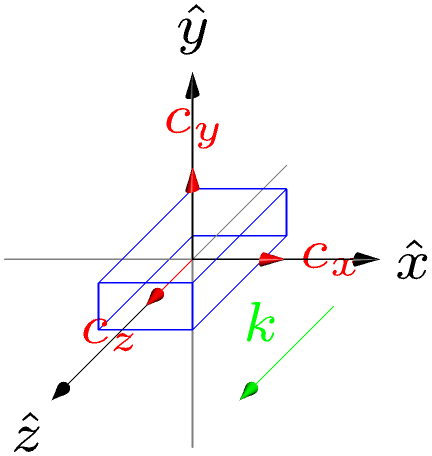

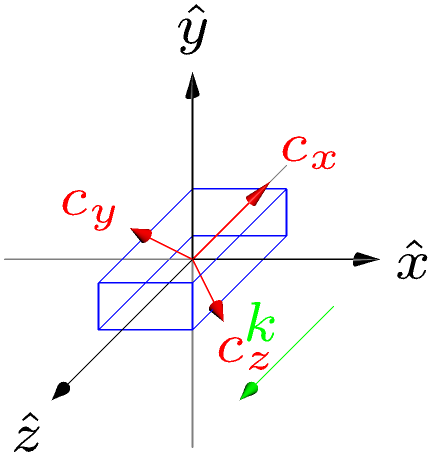

In [6]:
prefa = 'tmp_mata'
prefb = 'tmp_matb'

mat_a.make_crystal_axes_plot(prefa)
mat_b.make_crystal_axes_plot(prefb)

display(Image(prefa+'-crystal.png', width=300))

display(Image(prefb+'-crystal.png', width=300))


Observe that the crystal axes for the first material are in the default orientation aligned with the laboratory axes. The crystal axes for the second material have been rotated as described above. 
The blue box gives a sense of the orientation of the waveguide with propagation out of the screen along $\vec k \propto \hat{z}$.

## Anistropic materials

We now turn to anisotropic materials where the specific crystal orientation begins to matter. 

For we consider GaAs, which is a *cubic* material with symmetry group $4'3m$.
GaAs is actually a *piezoelectric* material which brings added complexity to the elastic behaviour.
We disable these effects in this tutorial and return to them in a subsequent tutorial.

In [7]:
mat_gaas = materials.make_material("GaAs_1970_Auld")
mat_gaas.disable_piezoelectric_effects()

print(mat_gaas, '\n')

print(mat_gaas.elastic_properties())

Material: GaAs [100]
  File: GaAs_1970_Auld
  Source: Auld
  Date: 1970 

Elastic properties of material GaAs_1970_Auld
  Density:        5307.000 kg/m^3
  Ref. index:     3.3702+0.0000j 
  Crystal class:  Cubic
  Crystal group:  4'3m
   
 Stiffness c_IJ, unit: GPa.
   Voigt 4-tensor:
    [[ 118.8000   53.8000   53.8000    0.0000    0.0000    0.0000]
     [  53.8000  118.8000   53.8000    0.0000    0.0000    0.0000]
     [  53.8000   53.8000  118.8000    0.0000    0.0000    0.0000]
     [   0.0000    0.0000    0.0000   59.4000    0.0000    0.0000]
     [   0.0000    0.0000    0.0000    0.0000   59.4000    0.0000]
     [   0.0000    0.0000    0.0000    0.0000    0.0000   59.4000]]

  Wave mode 1: v_p=4.7313 km/s,  |v_g|=4.7313 km/s,  u_j=[ 0.0000  0.0000  1.0000],  v_g=[ 0.0000  0.0000  4.7313] km/s
  Wave mode 2: v_p=3.3456 km/s,  |v_g|=3.3456 km/s,  u_j=[ 1.0000  0.0000  0.0000],  v_g=[ 0.0000  0.0000  3.3456] km/s
  Wave mode 3: v_p=3.3456 km/s,  |v_g|=3.3456 km/s,  u_j=[ 0.0000  1.0

Look at the lines reporting the three wave mode velocities and displacement eigenvectors. 

With the default orientation, the separation into longitudinal and shear modes is simple, and for each mode, the phase and group velocities are identical. Moreover, as expected the longitudinal mode is oriented along $z$ and the degenerate shear modes lie in the $x$-$y$ plane.

### Rotating an anistropic material
However, things become more interesting if we start rotating the crystal. 

First, let's make a $\pi/2$ rotation around the $y$ axis:


In [8]:
nvec = np.array([0.0,1.0,0.0])
phi = np.pi/2.

mat_gaas2= mat_gaas.copy()

mat_gaas2.rotate(nvec, phi)

print(mat_gaas2.elastic_properties())

Elastic properties of material GaAs_1970_Auld
  Density:        5307.000 kg/m^3
  Ref. index:     3.3702+0.0000j 
  Crystal class:  Cubic
  Crystal group:  4'3m
   
 Stiffness c_IJ, unit: GPa.
   Voigt 4-tensor:
    [[118.8000  53.8000  53.8000   0.0000  -0.0000   0.0000]
     [ 53.8000 118.8000  53.8000   0.0000   0.0000   0.0000]
     [ 53.8000  53.8000 118.8000   0.0000   0.0000   0.0000]
     [  0.0000   0.0000   0.0000  59.4000   0.0000   0.0000]
     [ -0.0000   0.0000   0.0000   0.0000  59.4000   0.0000]
     [  0.0000   0.0000   0.0000   0.0000   0.0000  59.4000]]

  Wave mode 1: v_p=4.7313 km/s,  |v_g|=4.7313 km/s,  u_j=[ 0.0000  0.0000  1.0000],  v_g=[ 0.0000  0.0000  4.7313] km/s
  Wave mode 2: v_p=3.3456 km/s,  |v_g|=3.3456 km/s,  u_j=[ 1.0000  0.0000  0.0000],  v_g=[-0.0000  0.0000  3.3456] km/s
  Wave mode 3: v_p=3.3456 km/s,  |v_g|=3.3456 km/s,  u_j=[ 0.0000  1.0000  0.0000],  v_g=[ 0.0000  0.0000  3.3456] km/s

 Piezoelectric properties:
  Piezo effects supported but di

Nothing changes! Since the crystal symmetry is cubic, the $\pi/2$ rotation around a crystal axis has left the material unchanged and all the wave properties are the same.

Now let's try a $\pi/4$ rotation around the $y$ axis:

In [9]:
nvec = np.array([0.0,1.0,0.0])
phi = np.pi/4.

mat_gaas2= mat_gaas.copy()

mat_gaas2.rotate(nvec, phi)

print(mat_gaas2.elastic_properties())

Elastic properties of material GaAs_1970_Auld
  Density:        5307.000 kg/m^3
  Ref. index:     3.3702+0.0000j 
  Crystal class:  Cubic
  Crystal group:  4'3m
   
 Stiffness c_IJ, unit: GPa.
   Voigt 4-tensor:
    [[145.7000  53.8000  26.9000   0.0000   0.0000   0.0000]
     [ 53.8000 118.8000  53.8000   0.0000   0.0000   0.0000]
     [ 26.9000  53.8000 145.7000   0.0000  -0.0000   0.0000]
     [  0.0000   0.0000   0.0000  59.4000   0.0000   0.0000]
     [  0.0000   0.0000  -0.0000   0.0000  32.5000   0.0000]
     [  0.0000   0.0000   0.0000   0.0000   0.0000  59.4000]]

  Wave mode 1: v_p=5.2397 km/s,  |v_g|=5.2397 km/s,  u_j=[-0.0000  0.0000  1.0000],  v_g=[-0.0000  0.0000  5.2397] km/s
  Wave mode 2: v_p=3.3456 km/s,  |v_g|=3.3456 km/s,  u_j=[ 0.0000  1.0000  0.0000],  v_g=[ 0.0000  0.0000  3.3456] km/s
  Wave mode 3: v_p=2.4747 km/s,  |v_g|=2.4747 km/s,  u_j=[ 1.0000  0.0000  0.0000],  v_g=[ 0.0000  0.0000  2.4747] km/s

 Piezoelectric properties:
  Piezo effects supported but di

Observe that the polarisation states indicated by the components of the $\vec u$ vectors are unchanged: there is a  longitudinal mode oriented along $z$ and two shear modes with vibrations in the $x$-$y$ plane. Moreover, the group velocity of each mode is still aligned with the wavevector $\vec q \propto \hat{z}$. 

However the two shear modes are no longer degenerate: they have different phase and group speeds, with the $x$-polarised mode having slowed by about 26%. As the crystal axis diagram below shows, this makes sense. The polarisation vectors of the two shear modes point along $\hat{x}$ and $\hat{y}$, but these two laboratory directions are no longer equivalent directions in the crystal.

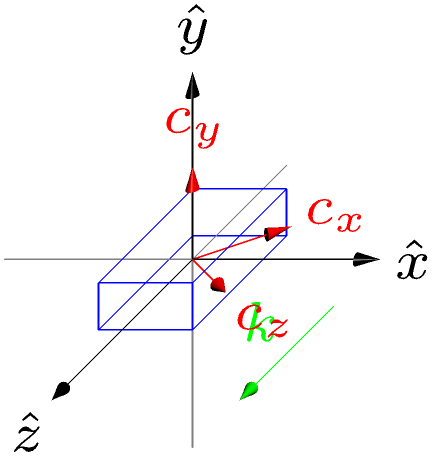

In [10]:
prefg='tmp_gaas2'
mat_gaas2.make_crystal_axes_plot(prefg)

display(Image(prefg+'-crystal.png', width=300))

Things get really interesting if we apply a rotation that is not commensurate with the crystal symmetries: a positive $\pi/3$ rotation around the $[1,1,1]$ direction:

In [11]:
nvec = np.array([1.0,1.0,1.0])
phi = np.pi/3.

mat_gaas3= mat_gaas.copy()
mat_gaas3.rotate(nvec, phi)
print(mat_gaas3.elastic_properties())

Elastic properties of material GaAs_1970_Auld
  Density:        5307.000 kg/m^3
  Ref. index:     3.3702+0.0000j 
  Crystal class:  Cubic
  Crystal group:  4'3m
   
 Stiffness c_IJ, unit: GPa.
   Voigt 4-tensor:
    [[150.6815  37.8593  37.8593   7.9704  -3.9852  -3.9852]
     [ 37.8593 150.6815  37.8593  -3.9852   7.9704  -3.9852]
     [ 37.8593  37.8593 150.6815  -3.9852  -3.9852   7.9704]
     [  7.9704  -3.9852  -3.9852  43.4593   7.9704   7.9704]
     [ -3.9852   7.9704  -3.9852   7.9704  43.4593   7.9704]
     [ -3.9852  -3.9852   7.9704   7.9704   7.9704  43.4593]]

  Wave mode 1: v_p=5.3341 km/s,  |v_g|=5.3484 km/s,  u_j=[-0.0400 -0.0400  0.9984],  v_g=[-0.2763 -0.2763  5.3341] km/s
  Wave mode 2: v_p=3.1034 km/s,  |v_g|=3.3219 km/s,  u_j=[ 0.7060  0.7060  0.0565],  v_g=[ 0.8378  0.8378  3.1034] km/s
  Wave mode 3: v_p=2.5860 km/s,  |v_g|=2.6583 km/s,  u_j=[-0.7071  0.7071 -0.0000],  v_g=[-0.4356 -0.4356  2.5860] km/s

 Piezoelectric properties:
  Piezo effects supported but di

Now the phase and group velocities are different and the eigenstates are hybrid in character with polarisation vectors pointing along irregular directions. Nevertheless, the first mode is close to longitudinal, the second mode is close to shear, and the third is pure shear. This phenomenon of "quasi-longitudinal", "quasi-shear" and pure shear modes is common.

### Dispersion diagrams
We can obtain a much fuller picture by plotting several bulk dispersion properties as a function of the wavevector in 2D and 3D.

Here's the dispersion maps for propagation in the $x$-$z$ plane for the default orientation of GaAs.

In [34]:
prefix = 'tmpgaas'
mat_gaas.plot_bulk_dispersion_all(prefix)
img_single(prefix+'-bulkdisp-all.png', 'GaAs bulk dispersion', 400)

These plots respectively show contours of the *phase velocity* surface  (top-left), the *slowness* surface $1/v_p(\vec \kappa)$ (top-right), the *ray* or group velocity surface (bottom-left) and the full 3D slowness surface (bottom-right).

The colours in the first three plots correspond to the component of each wave mode's elastic polarisation along the propagation direction, ie $r=\hat{\kappa} \cdot \hat{u} = \hat{z} \cdot \hat{u}$. The lines and dots also indicate the polarisation states. It is apparent that the pink coloured mode is close to longitudinal and the blue modes are close to transverse (shear). It turns out that for a given wavevector, the group velocity is *normal* to the slowness surface. Tracing around the outer curve quasi-shear mode in the first plot can help to understand the cusps in the corresponding curve of the group velocity plot.

Here we compare the slowness calculation with the corresponding figure from Auld. The `mark_velocities` argument takes a list of velocities to be marked (as a small green dot) on the coordinate axes to identify points of interest. (In this case, the value $2.5\times 10^{-4}$ s/m marked on the Auld plot.)

In [13]:
imggaas_ivp = mat_gaas.plot_bulk_dispersion_ivp("tmpgaas_ivp", mark_velocities=(1/2.5e-4,))
img_pair(imggaas_ivp, "images/auld_fig7_2.png",  'X-cut, (piezo off) - NumBAT', 'X cut, piezo off - Auld Fig. 7.2', 360, 360)

By default, bulk dispersion plots are always shown in the $x$-$z$ plane corresponding to the propagation direction in NumBAT waveguide calculations. To see other cuts, we can rotate the crystal. Alternatively one can use the `cut_plane` argument explained at the end of this file to perform different slices through the crystal. However, rotating the crystal corresponds more naturally to the experimental reality and allows a check that the bulk behaviour is expected before performing full waveguide calculations. 

Here is the case for a $\pi/4$ rotation within one of the cubic crystal faces.

In [35]:
prefix = 'tmpgaas2'
mat_gaas2.plot_bulk_dispersion_all(prefix)
img_single(prefix+'-bulkdisp-all.png', 'GaAs 45° rotation', 400)

And here is the case for GaAs with the $\pi/3$ rotation:

In [36]:
prefix = 'tmpgaas3'
mat_gaas3.plot_bulk_dispersion_all(prefix)
img_single(prefix+'-bulkdisp-all.png', 'GaAs 60° rotation', 400)

## Special crystal orientations

Rotations in NumBAT can be specified in several ways.

As well as the angle and unit vector, the coordinate axes can be named directly, and rotation calls can be made successively
to apply sequences of rotations. Here's a sequence of 3 rotations, rather like a so-called "Euler rotation".

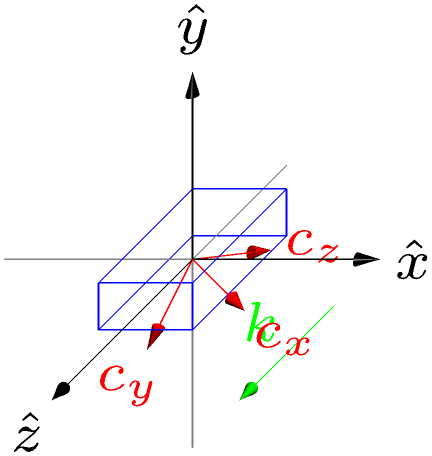

In [37]:
mat_3 = mat_gaas.copy()

mat_3.rotate('x-axis', np.pi/4)        # Apply a positive pi/4 rotation around the lab x axis
mat_3.rotate('z', np.pi/5)             # Now apply a positive pi/5 rotation around the lab z axis
mat_3.rotate('x-axis', -4*np.pi/3)     # Now apply a negative -4pi/3 rotation around the lab x axis

pref='tmp3'
mat_3.make_crystal_axes_plot(pref)
display(Image(pref+'-crystal.png', width=300))


To return to the starting configuration, use `reset_orientation()` (or just make a new material from scratch).

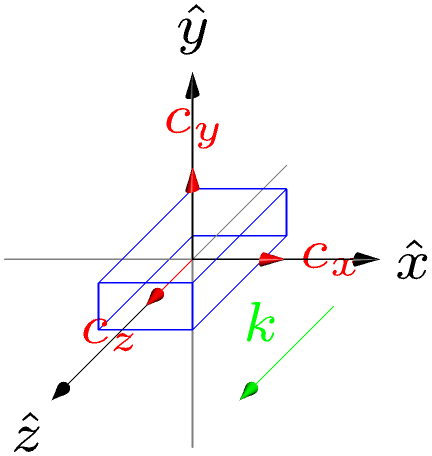

In [38]:
mat_3.reset_orientation()
mat_3.make_crystal_axes_plot(pref)
display(Image(pref+'-crystal.png', width=300))

Some materials define special directions which are commonly encountered. For example, many important semiconductors such as lithium niobate can be obtained in so-called *x-cut*, *y-cut* or *z-cut* varieties.

The orientations corresponding to each of these materials can be obtained by applying sequences of rotations like above. However, it is also possible to define specific rotations in the `.json` file.

For lithium niobate, which has trigonal symmetry, the default orientation is *y-cut*, with the optical symmetry axis $\hat{c}_z$ pointing along the $\hat{z}$ direction:

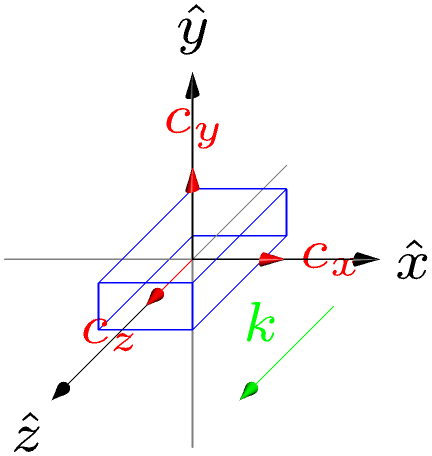

In [39]:
mat_LiNb_y = materials.make_material('LiNbO3aniso_2021_Steel')
pref='tmp_linb'

mat_LiNb_y.make_crystal_axes_plot(pref+'-ycut')
display(Image(pref+'-ycut-crystal.png', width=300))

Instead, selecting the *z-cut* orientation reorients the $\hat{c}_z$ axis to point along $-\hat{y}$ by applying a $\pi/2$ rotation around the positive $\hat{x}$ axis:

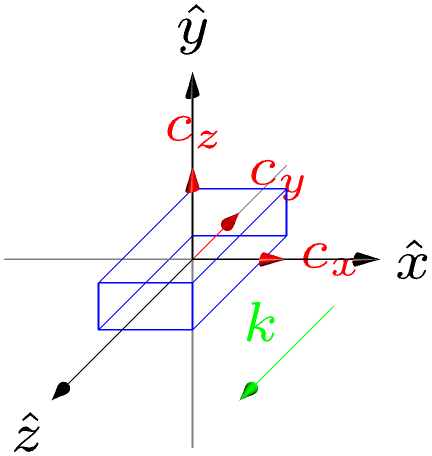

In [40]:
mat_LiNb_z = mat_LiNb_y.copy()
mat_LiNb_z.set_orientation('z-cut')
mat_LiNb_z.make_crystal_axes_plot(pref+'-zcut')
display(Image(pref+'-zcut-crystal.png', width=300))

The different direction names here are admittedly confusing, because our choice of coordinates for the waveguide directions is not universal. The key point is that for the $z$-cut orientation, the $\hat{c}_z$ axis points upwards out of the waveguide which is the standard convention.

The different orientations are reflected in the bulk dispersion properties of the different cases as shown below (we add in the $y$-cut case too). The 3D plots are identical, but the projections in the $x$-$z$ plane are different. The $z$-cut case shows the full 6-fold symmetry of the hexagonal crystal. The orientation of the $x$-cut case leads to a 4-fold symmetry for propagation in the $x$-$z$ plane.

In [41]:
print(mat_LiNb_y.elastic_properties())
print(mat_LiNb_z.elastic_properties())

Elastic properties of material LiNbO3aniso_2021_Steel
  Density:        4650.000 kg/m^3
  Ref. index:     2.3000+0.0000j 
  Crystal class:  Trigonal
  Crystal group:  no sym
   
 Stiffness c_IJ, unit: GPa.
   Voigt 4-tensor:
    [[199.2000  54.7000  70.0000   7.9000   0.0000   0.0000]
     [ 54.7000 199.2000  70.0000  -7.9000   0.0000   0.0000]
     [ 70.0000  70.0000 240.0000   0.0000   0.0000   0.0000]
     [  7.9000  -7.9000   0.0000  59.9000   0.0000   0.0000]
     [  0.0000   0.0000   0.0000   0.0000  59.9000   7.9000]
     [  0.0000   0.0000   0.0000   0.0000   7.9000  72.2000]]

  Wave mode 1: v_p=7.1842 km/s,  |v_g|=7.1842 km/s,  u_j=[ 0.0000  0.0000  1.0000],  v_g=[ 0.0000  0.0000  7.1842] km/s
  Wave mode 2: v_p=3.5891 km/s,  |v_g|=3.6202 km/s,  u_j=[ 1.0000  0.0000  0.0000],  v_g=[ 0.0000  0.4734  3.5891] km/s
  Wave mode 3: v_p=3.5891 km/s,  |v_g|=3.6202 km/s,  u_j=[ 0.0000  1.0000  0.0000],  v_g=[ 0.0000 -0.4734  3.5891] km/s

 Piezoelectric properties:
  Piezo effects sup

In [42]:
mat_LiNb_x = mat_LiNb_y.copy()
mat_LiNb_x.set_orientation('x-cut')

fnx=mat_LiNb_x.plot_bulk_dispersion_all(pref+'-xcut', label='LiNbO3 x-cut')
fny=mat_LiNb_y.plot_bulk_dispersion_all(pref+'-ycut', label='LiNbO3 y-cut')
fnz=mat_LiNb_z.plot_bulk_dispersion_all(pref+'-zcut', label='LiNbO3 z-cut')

img_single(fnx, 'LiNbO3 x-cut bulk dispersion (no piezo)', 400)
img_single(fny, 'LiNbO3 y-cut bulk dispersion (no piezo)', 400)
img_single(fnz, 'LiNbO3 z-cut bulk dispersion (no piezo)', 400)


## Bulk dispersion and core-cladding guidance

A useful application of the bulk dispersion curves is as a tool to predict the guidance properties of two media by comparing their slowness curves.

Consider the first non-fibre conventional waveguide to show SBS: a chalcogenide ($\mathrm{As}_2\mathrm{S}_3$) strip waveguide on a silica substrate. 



In [43]:
mat_SiO2 = materials.make_material('SiO2_2021_Poulton')
mat_As2S3 = materials.make_material('As2S3_2021_Poulton')

print(mat_SiO2.elastic_properties(), '\n\n')

print(mat_As2S3.elastic_properties())

Elastic properties of material SiO2_2021_Poulton
  Density:        2200.000 kg/m^3
  Ref. index:     1.4500+0.0000j 
  Crystal class:  Isotropic
  Crystal group:  no sym
  c11:            78.500 GPa
  c12:            16.100 GPa
  c44:            31.200 GPa
  Young's mod E:  73.020 GPa
  Poisson ratio:  0.170
  Velocity long.: 5973.426 m/s
  Velocity shear: 3765.875 m/s
  Velocity Rayleigh: 3411.154 m/s 


Elastic properties of material As2S3_2021_Poulton
  Density:        3200.000 kg/m^3
  Ref. index:     2.4500+0.0000j 
  Crystal class:  Isotropic
  Crystal group:  no sym
  c11:            18.900 GPa
  c12:            6.000 GPa
  c44:            6.400 GPa
  Young's mod E:  15.897 GPa
  Poisson ratio:  0.242
  Velocity long.: 2430.278 m/s
  Velocity shear: 1414.214 m/s
  Velocity Rayleigh: 1298.833 m/s


Noting that the chalcogenide refractive index is higher, we are motivated by optical guidance to use it as the core material.

We then note that both the elastic wave velocities for the chalcogenide are lower than the shear velocity for the silica. Consequently, we can expect
the chalcogenide to form a suitable elastic cladding, which is indeed the case and explains why this system successfully showed SBS in 2012.

For isotropic materials, this is sufficient investigation, but we can confirm the result by comparing the slowness curves for both materials on one plot:

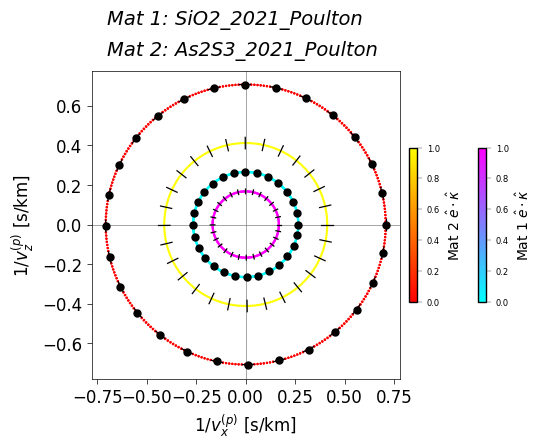

In [44]:
materials.compare_bulk_dispersion(mat_SiO2, mat_As2S3, 'comp_sio2_as2s3')

The slowness curves for silica are shown in red/orange, those for the chalcogenide are shown in blue and magenta. Since the latter are entirely contained in the former, the chalcogenide is an elastically slow material and forms an ideal cladding.

Now consider the silicon/silica or SOI system.

In [24]:
mat_SiO2 = materials.make_material('SiO2_2021_Poulton')
mat_Si = materials.make_material('Si_1970_Auld')

print(mat_SiO2.elastic_properties(), '\n\n')

print(mat_Si.elastic_properties())

Elastic properties of material SiO2_2021_Poulton
  Density:        2200.000 kg/m^3
  Ref. index:     1.4500+0.0000j 
  Crystal class:  Isotropic
  Crystal group:  no sym
  c11:            78.500 GPa
  c12:            16.100 GPa
  c44:            31.200 GPa
  Young's mod E:  73.020 GPa
  Poisson ratio:  0.170
  Velocity long.: 5973.426 m/s
  Velocity shear: 3765.875 m/s
  Velocity Rayleigh: 3411.154 m/s 


Elastic properties of material Si_1970_Auld
  Density:        2332.000 kg/m^3
  Ref. index:     3.5000+0.0000j 
  Crystal class:  Cubic
  Crystal group:  no sym
   
 Stiffness c_IJ, unit: GPa.
   Voigt 4-tensor:
    [[ 165.7000   79.5600   79.5600    0.0000    0.0000    0.0000]
     [  79.5600  165.7000   79.5600    0.0000    0.0000    0.0000]
     [  79.5600   79.5600  165.7000    0.0000    0.0000    0.0000]
     [   0.0000    0.0000    0.0000   63.9000    0.0000    0.0000]
     [   0.0000    0.0000    0.0000    0.0000   63.9000    0.0000]
     [   0.0000    0.0000    0.0000    0.000

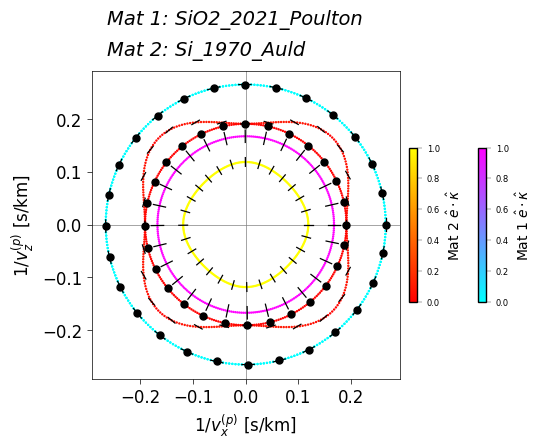

In [45]:
materials.compare_bulk_dispersion(mat_SiO2, mat_Si, 'comp_sio2_si')

Here we see that the slowness curves are interleaved but both families of waves are slower in silica than their corresponding modes in silicon. Consequently, we can't guide both sound and light in a conventional SOI waveguide, and all SBS demonstrations in this class of platform have involved special techniques such as undercut waveguides or pillar structures.

A similar case arises with lithium niobate and silica (and a number of other potential substrates). Lithium niobate and silica form an excellent core-cladding combination for light guidance but the elastic wave situation is as follows:

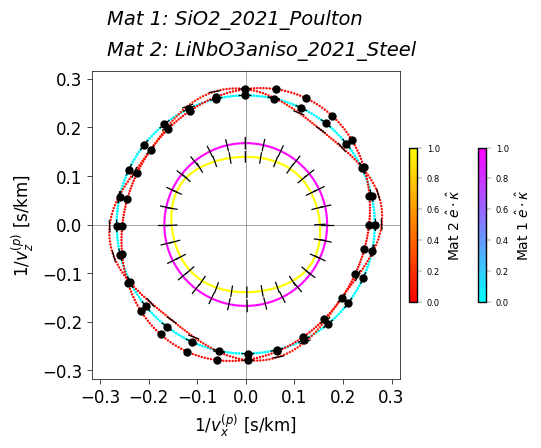

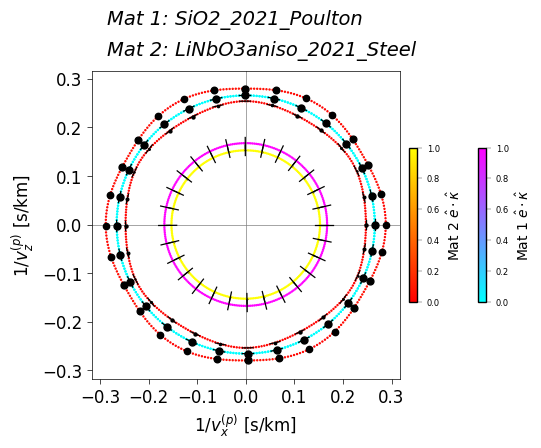

In [46]:

materials.compare_bulk_dispersion(mat_SiO2, mat_LiNb_x, 'comp_sio2_linb_x')

materials.compare_bulk_dispersion(mat_SiO2, mat_LiNb_z, 'comp_sio2_linb_z')

This material combination fails for both common crystal orientations.

However, as several groups have realised, while these elastic properties forbid total internal reflection elastic guidance
in a conventional waveguide, and it does not forbid efficient elastic guidance as a Rayleigh-like surface mode.

## Dispersion relations with different cut planes


By default, NumBAT draws dispersion plots in the conventional $x$-$z$ propagation plane and up to now, we have examined propagation along different crystal planes by actively rotating the crystal into the desired orientation for propagation in the $x$-$z$ plane.

However, if the plane of interest aligns with a Cartesian axis, we can explicitly select a cut plane using the parameter `cut_plane` with values `xy`, `yz` or `xz`.

For example, here are two equivalent ways of viewing slowness curves in two orthogonal planes of lithium niobate. Note that this a piezo-electric material. Consideration of those effects is left to the following tutorial. 

In the first approach, we specify the desired cut plane with the `cut_plane` argument. Notice that the axis labels are consistent:

In [47]:
import materials
mat_LiNbO3 = materials.make_material("LiNbO3_1973_Auld")
mat_LiNbO3.disable_piezoelectric_effects()

imsz=300
vels = (1/1.8e-4,)
img_xy_off = mat_LiNbO3.plot_bulk_dispersion_ivp("tmp_xy_off", show_poln=True, cut_plane="xy", mark_velocities=vels)
img_pair(img_xy_off, "images/auld_fig8_10.png", 'xy plane piezo off', 'xy plane piezo off', imsz, imsz)

img_yz_off = mat_LiNbO3.plot_bulk_dispersion_ivp("tmp_yz_off", show_poln=True, cut_plane="yz", mark_velocities=vels)
img_pair(img_yz_off, "images/auld_fig8_9.png", 'yz plane piezo off', 'yz plane piezo off', imsz, imsz)


In the second approach, we apply a rotation to move the desired cut plane into the $x$-$z$ plane. Now the axis labels always refer to the $x$ and $z$ directions.

The $X$ cut case illustrates the fact that for lithium niobate, the $X$-cut and $-X$-cut orientations are not equivalent and show mirror behaviour for the dispersion.  

In [48]:
# Zcut orientation moves x-y axes into the horizontal x-z plane
mat_LiNbO3_zc = mat_LiNbO3.copy()
mat_LiNbO3_zc.set_orientation('z-cut')

imgrot_z_off = mat_LiNbO3_zc.plot_bulk_dispersion_ivp("tmp_zrot_off", show_poln=True, mark_velocities=vels)
img_pair(imgrot_z_off, "images/auld_fig8_10.png", 'Z cut piezo off', 'Z cut piezo off', imsz, imsz)

# Xcut orientation moves y-z axes into the horizontal x-z plane
mat_LiNbO3_xc = mat_LiNbO3.copy()
mat_LiNbO3_nxc = mat_LiNbO3.copy()
mat_LiNbO3_xc.set_orientation('x-cut')
mat_LiNbO3_nxc.set_orientation('negx-cut')

imgrot_x_off = mat_LiNbO3_xc.plot_bulk_dispersion_ivp("tmp_xrot_off", show_poln=True, mark_velocities=vels)
img_pair(imgrot_x_off, "images/auld_fig8_9.png", 'X cut piezo off', 'X cut piezo off', imsz, imsz)

imgrot_x_noff = mat_LiNbO3_nxc.plot_bulk_dispersion_ivp("tmp_xrot_noff", show_poln=True, mark_velocities=vels)
img_pair(imgrot_x_noff, "images/auld_fig8_9.png", '-X cut piezo off', 'X cut piezo off', imsz, imsz)
